In [1]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Datast
data = pd.read_csv('zomato.csv')

In [3]:
data.head(2) #prints the first 2 rows of Dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
data['url'][0] #checking the first URL in dataset

'https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'

In [5]:
# Looking at the information about the dataset, datatypes of the coresponding columns and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#getting columns names of Dataset
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#checking the null values in Dataset
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [9]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

As we can observe the 'location' field offers more precise location as compared to the column 'listed_in(city)' column, we will use the 'location' column.

In [10]:
data.drop(['url','address','phone','listed_in(city)'],axis=1,inplace=True)

In [11]:
def missing_values(data,thresh=20, color='black' , edgecolor = 'black' ,height=3 ,width = 15):
    
    plt.figure(figsize=(width , height))
    percentage = (data.isna().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color , edgecolor=edgecolor)
    plt.axhline(y=thresh ,color='r', linestyle='-')
    
    plt.title('missing values percentage per column' , fontsize=20 , weight = 'bold')
    plt.text(7 ,thresh+ 12.5,f'Columns with more than {thresh}% missing values ' , fontsize=12 , color='crimson' , ha='left', va='top')
    plt.text(7 ,thresh- 5,f'Columns with less than {thresh}% missing values ' , fontsize=12 , color='green' , ha='left', va='top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

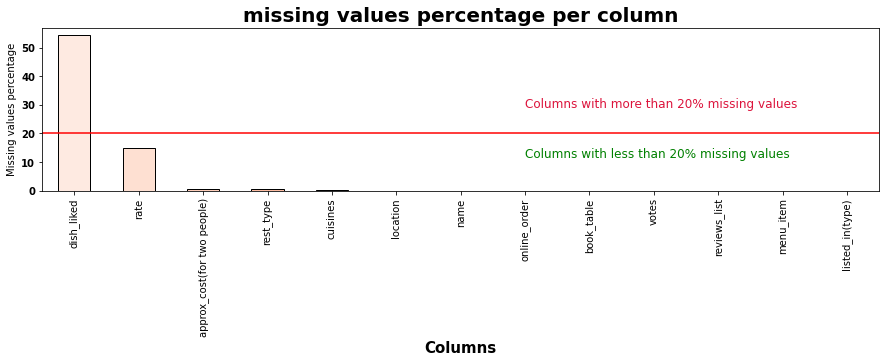

In [12]:
missing_values(data ,thresh=20, color = sns.color_palette('Reds',15))

We will remove dish_liked columns as it has more than 50% null values

In [13]:
data.drop(columns='dish_liked',axis=1 ,inplace=True)

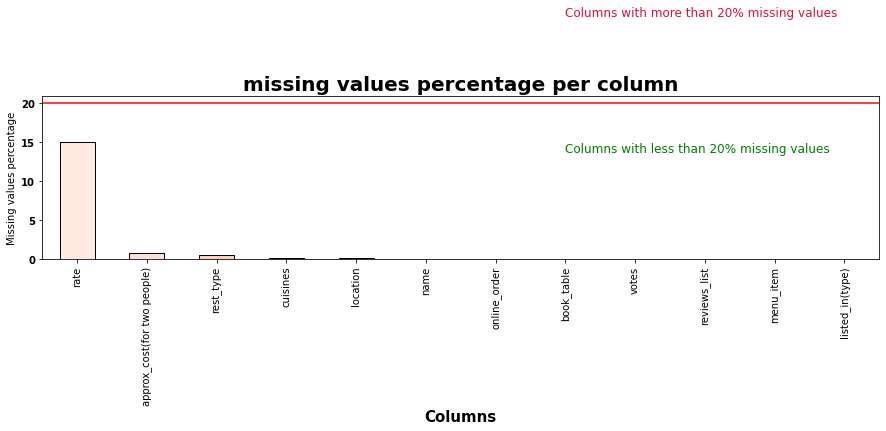

In [14]:
missing_values(data ,thresh=20, color = sns.color_palette('Reds',15))

For the null values present in the 'rate' column, we will replace them with the mode of the 'rate' column. We can not remove this column, because we won't have any dependent column left with us once we remove it.

In [15]:
data['rate'] = data['rate'].fillna(data['rate'].mode()[0])

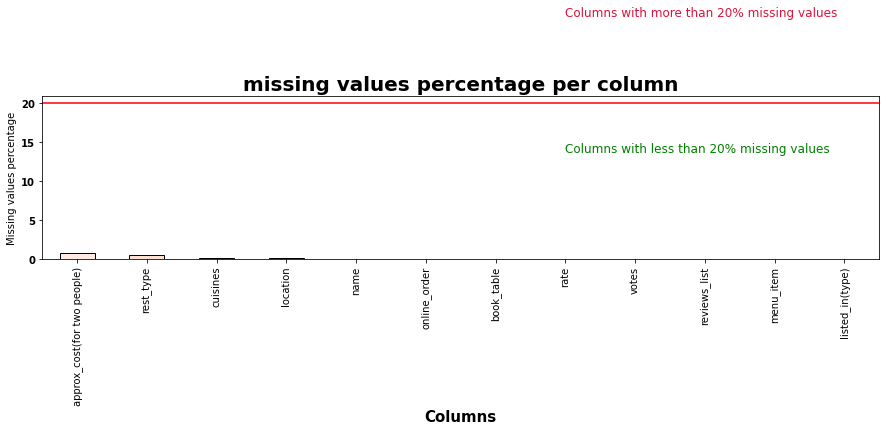

In [16]:
missing_values(data ,thresh=20, color = sns.color_palette('Reds',15))

We will remove the rows having null values for the above column

In [17]:
previous_data = data
data.dropna(inplace=True)

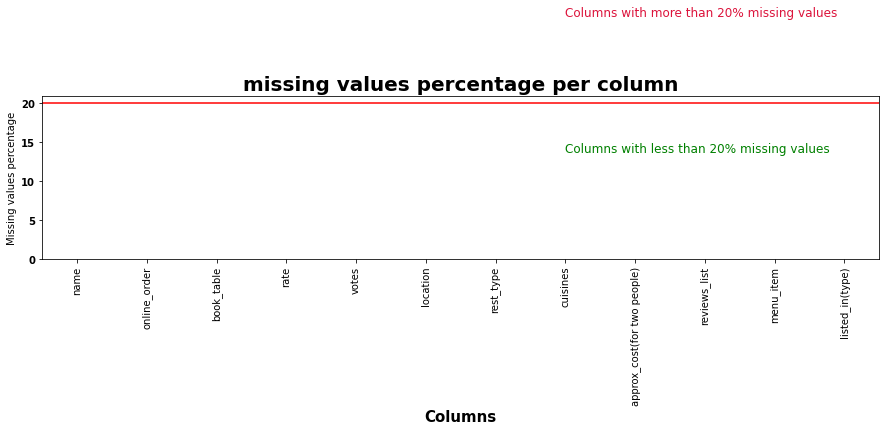

In [18]:
missing_values(data ,thresh=20, color = sns.color_palette('Reds',15))

In [19]:
data.isna().sum().sum()

0

In [20]:
data.shape

(51148, 12)

# Rating Distribution

In [21]:
data['rate'].value_counts()

NEW       9820
3.9/5     2091
3.7/5     2008
3.8/5     1999
3.9 /5    1867
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [22]:
print("rate column type: ", type(data['rate'][0]))

rate column type:  <class 'str'>


We can see a category named 'new' which indicates that the restaurant is fairly new, hence we will replace the value 'new' with '2.5' as it can be mode as well as bad..we don't know that yet. Please note we will replace with '2.5 /5' for maintaing uniform format.

In [23]:
data['rate'].replace({"NEW" : "2.5/5"},inplace=True)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.5/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
a = data.loc[data['rate']=='-'].index
data.drop(a , axis=0 , inplace=True)

data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.5/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

The problem is that the given scores are out of 5 and that the data type is string. So first we will need to store only the scores and then convert into float datatype.

In [25]:
print("rate column type: ", type(data['rate'][0]))

rate column type:  <class 'str'>


In [26]:
data['rate'] = data['rate'].apply(lambda x : x.split('/')[0])
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [27]:
data['rate'] = data['rate'].apply(lambda x: x.split(" ")[0])
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [28]:
data = data.astype({'rate': float})
print(data['rate'].dtype)

float64


We have successfully converted the 'rate' column values to float.

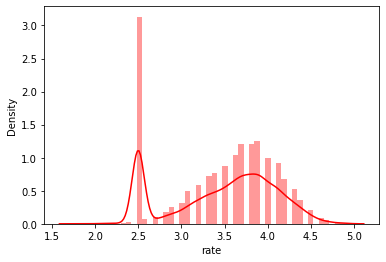

In [29]:
sns.distplot(data['rate'], color='r')
plt.show()

As we know before '2.5' represents the 'NEW' restaurants, and there were about 9800 restaurants that were NEW, that's why the above distribution is multi-modal. If we ignore the 'NEW' Restaurants we can observe that the graph resembles bell-shape i.e it's normally distributed.

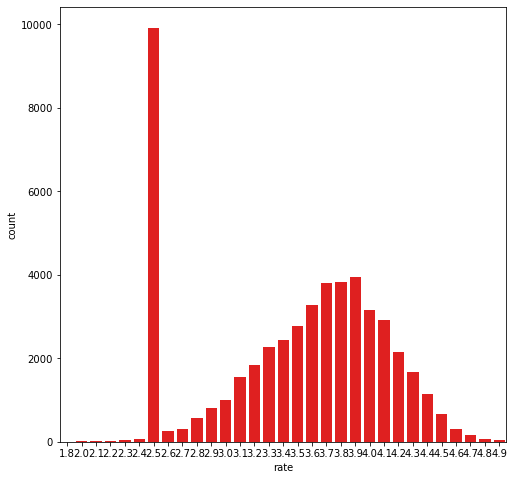

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(data['rate'],color='r')
plt.show()

Maximum of the restaurants are pretty NEW. Apart from the recently opened restaurants, most of the Restaurants received 3.9 rating, followed by 3.7 and 3.8. Only a few restaurants have 4.8 or 4.9 rating. Let's see which are these restaurants.

In [31]:
print("Restorents having hight rtings : \n", data.loc[(data['rate']==4.8 )| (data['rate'] == 4.9)]['name'].unique())

Restorents having hight rtings : 
 ["Brahmin's Coffee Bar" 'The Black Pearl' 'Byg Brewski Brewing Company'
 'Belgian Waffle Factory' "AB's - Absolute Barbecues" 'Flechazo'
 'Punjab Grill' 'Asia Kitchen By Mainland China' 'House Of Commons'
 'The Pizza Bakery' 'Milano Ice Cream' 'Barbeque Nation' 'Biergarten'
 "Chili's American Grill & Bar" 'O.G. Variar & Sons' 'The Globe Grub'
 'The Boozy Griffin'
 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine'
 'CTR' 'Barbecue by Punjab Grill']


As expected, these are restaurant chains that are present all around the globe. These restaurants are pretty amazing that's why they have the highest rating.

Note: The one restaurant having such a large name must have been parsed incorrectly by the creator.

# Name

The same restaurant chain can be present at different location. Let's first check the number of unique restaurant present in the city.

In [32]:
print("Total number of restorents in Bengaluru is : ", len(data['name'].unique()))

Total number of restorents in Bengaluru is :  8720


Let's see which restaurant have the highest number of outlets across the city.

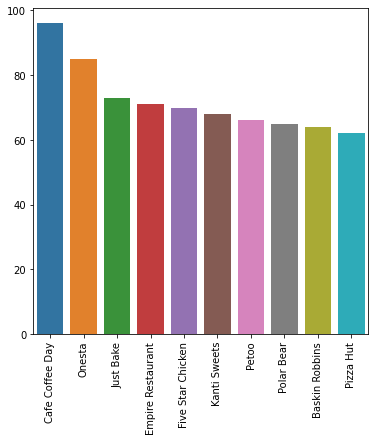

In [33]:
plt.figure(figsize=(6,6))
index = data['name'].value_counts().head(10).index
values = data['name'].value_counts().head(10).values
sns.barplot(x=index , y=values)
plt.xticks(rotation = 90)
plt.show()

Cafe Coffee Day(a coffee chain) had the maximum number of outlets. Sweet shops like Kanti sweet or pizza chains like Pizza Hut also have a lot of outlets across the city.

Having a large number of outlets does not gurantee a higher rating. Let's see which restaurant chain have the highest rating grouping by their name

In [34]:
data.groupby('name')['rate'].mean().sort_values(ascending=False).head(15)

name
Byg Brewski Brewing Company                                                         4.900000
Asia Kitchen By Mainland China                                                      4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
O.G. Variar & Sons                                                                  4.800000
Flechazo                                                                            4.800000
The Pizza Bakery                                                                    4.800000
AB's - Absolute Barbecues                                                           4.789474
CTR                                                                                 4.750000
Barbecue by Punjab Grill                                         

We can see that the top 15 restaurants by ratings are completely different from those which have the highest number of outlets

In [35]:
data.groupby('name')['votes','rate'].max().sort_values(ascending=False , by='votes').head(15)

,votes,rate
name,,
Byg Brewski Brewing Company,16832,4.9
Toit,14956,4.7
Truffles,14726,4.7
AB's - Absolute Barbecues,12121,4.9
The Black Pearl,10550,4.8
Big Pitcher,9300,4.7
Onesta,9085,4.6
Arbor Brewing Company,8419,4.5
Empire Restaurant,8304,4.4


Above are the 15 restaurants that have got the highest number of user votes. The ratings for these restaurants are also very high as expected. More votes most probably leads to better rating.

# Online Order

In [36]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
#converting into integers
data['online_order'].replace({'Yes':1 ,'No':0}, inplace=True)

In [38]:
data['online_order'].unique()

array([1, 0], dtype=int64)

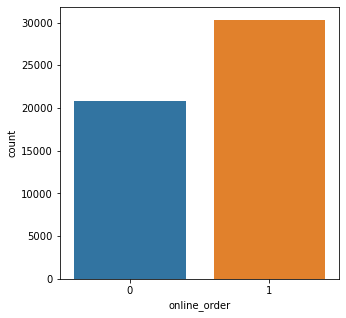

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(data['online_order'])
plt.show()

<AxesSubplot:>

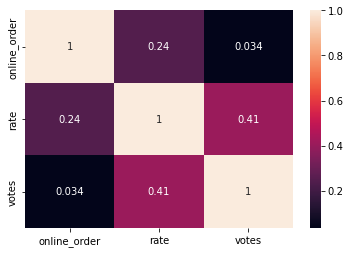

In [40]:
correlation = data.corr()
sns.heatmap(correlation , annot=True)

Correlation of 'rating' with 'online_table' is 0.24.

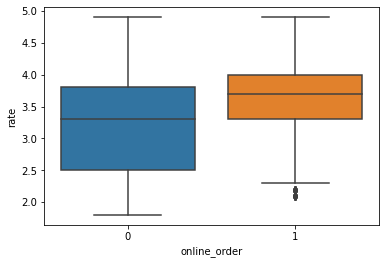

In [41]:
sns.boxplot(x='online_order' , y='rate',data=data)
plt.show()

We can observe from the above plot that those restaurants which offer online order has a higher median rating as compared to those restaurants that don't.

It makes sense also because Zomato offers home delivery for online orders also, so more people will give rating for online_order restaurants on their platform.

# Book Table

In [42]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
data['book_table'].replace({'Yes':1,'No':0}, inplace=True)

<AxesSubplot:>

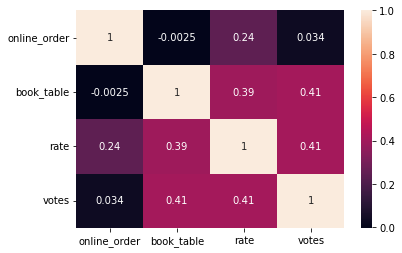

In [44]:
correlation= data.corr()
sns.heatmap(correlation , annot=True)

Book_table has a correlation of 0.39 with the ratings given.

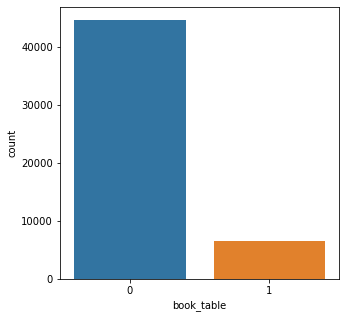

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(data['book_table'])
plt.show()

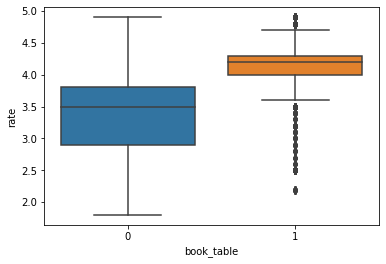

In [46]:
sns.boxplot(x=data['book_table'] , y=data['rate'])
plt.show()

Eventhough there are some outliers for the book_table class, we can see that the lower whisker of '1''s boxplots which represents the minimum rating of the restaurants that book table in advance, is greater than the 50th percentile value or the median of the ratings of the restaurants that don't book table in advance. 


Some restaurants that don't book table in advance also have ratings close to 5. The IQR for '1' boxplot is quite small which represents small variation of the ratings around median. Therefore, if the restaurants offer to book table in advance, more ratings are given.

# Approx Cost

In [47]:
print("Data type for Approc cost for two people is : ", data['approx_cost(for two people)'].dtype)

Data type for Approc cost for two people is :  object


We have to convert it into integer.

There are values like '1,200' we need to first convert such strings to '1200' then to 1200.

In [48]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x:x.replace(",",""))

In [49]:
data = data.astype({"approx_cost(for two people)" : int})
print("Data type for Approx cost for two people is : ", data['approx_cost(for two people)'].dtype)

Data type for Approx cost for two people is :  int32


<AxesSubplot:>

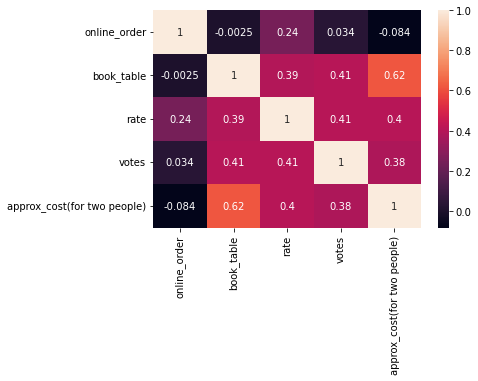

In [50]:
correlation= data.corr()
sns.heatmap(correlation , annot=True)

In [51]:
data.groupby('name')['rate','approx_cost(for two people)'].mean().sort_values(by='rate', ascending=False).head(15)

,rate,approx_cost(for two people)
name,,
Byg Brewski Brewing Company,4.900000,1600.000000
Asia Kitchen By Mainland China,4.900000,1500.000000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000,1000.000000
Punjab Grill,4.871429,2000.000000
Belgian Waffle Factory,4.844828,400.000000
O.G. Variar & Sons,4.800000,200.000000
Flechazo,4.800000,1400.000000
The Pizza Bakery,4.800000,1200.000000
AB's - Absolute Barbecues,4.789474,1568.421053


We can observe some of the top-rated restaurants are quite expensive. Punjab Grill costs 1000 per person, whereas CTR costs 75 per person.

Let's see the distribution of this feature.

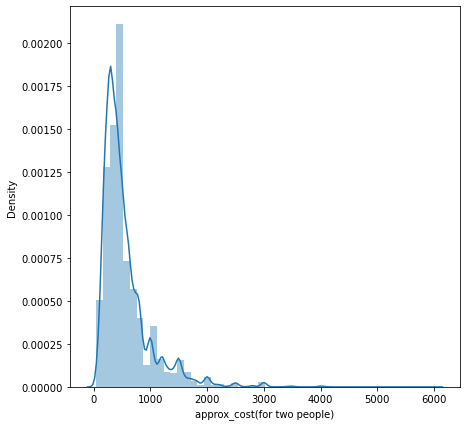

In [52]:
plt.figure(figsize=(7,7))
sns.distplot(data['approx_cost(for two people)'])
plt.show()

In [53]:
print("The name of most expensive restaurent is {} and it is located at {}".format(
data.loc[data["approx_cost(for two people)"]==data["approx_cost(for two people)"].max()]['name'].unique()[0],
data.loc[data["approx_cost(for two people)"]==data["approx_cost(for two people)"].max()]['location'].unique()[0]
))

The name of most expensive restaurent is Le Cirque Signature - The Leela Palace and it is located at Old Airport Road


In [54]:
data['approx_cost(for two people)'].sort_values(ascending=False).head(15).unique()

array([6000, 5000, 4500, 4100, 4000])

Top 15 restaurants cost ran range from 4000 to 6000 Rupees for two people

# Location

In [55]:
data.groupby('location')['rate'].mean().sort_values(ascending = False).head(10)

location
St. Marks Road           4.017201
Lavelle Road             4.009943
Church Street            3.931810
Sankey Road              3.911111
Koramangala 5th Block    3.896610
Koramangala 3rd Block    3.857009
Cunningham Road          3.855397
Rajarajeshwari Nagar     3.850000
Langford Town            3.807407
Race Course Road         3.745324
Name: rate, dtype: float64

The above 10 locations have the best average ratings. These are the paces you must visit if you are a food lover.

# Cuisines

In [56]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In order to analyse the cuisine column, let's make a new column called 'Number_of_cuisines_offered'.

In [57]:
len(data['cuisines'][4].split(','))

2

In [58]:
data['Number_of_cuisines_offered'] = data['cuisines'].apply(lambda x : len(x.split(',')))

In [59]:
data.corr()

,online_order,book_table,rate,votes,approx_cost(for two people),Number_of_cuisines_offered
online_order,1.000000,-0.002504,0.242004,0.034114,-0.084069,0.106474
book_table,-0.002504,1.000000,0.391537,0.405981,0.618064,0.263471
rate,0.242004,0.391537,1.000000,0.406135,0.404836,0.247356
votes,0.034114,0.405981,0.406135,1.000000,0.381563,0.231998
approx_cost(for two people),-0.084069,0.618064,0.404836,0.381563,1.000000,0.268651
Number_of_cuisines_offered,0.106474,0.263471,0.247356,0.231998,0.268651,1.000000


In [60]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)
correlation

,rate
rate,1.000000
votes,0.406135
approx_cost(for two people),0.404836
book_table,0.391537
Number_of_cuisines_offered,0.247356
online_order,0.242004


Number of cuisines offered have very little correlation with the rating.

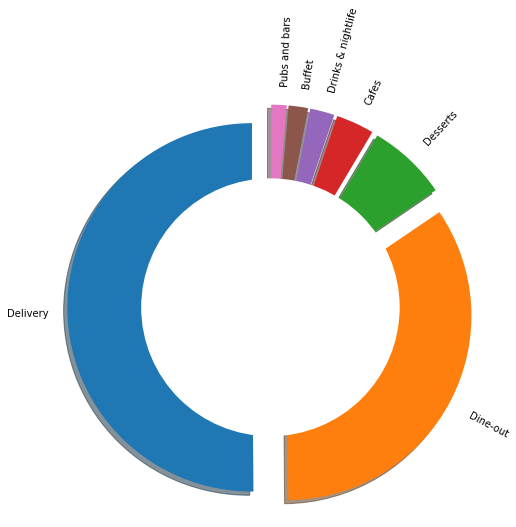

In [61]:
labels = data['listed_in(type)'].value_counts().index
values = data['listed_in(type)'].value_counts().values

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
fig , ax = plt.subplots(figsize=(8,8))

ax.pie(values , labels=labels ,shadow=True ,startangle=90 , explode=explode ,rotatelabels=True )
center_circle=plt.Circle((0,0),0.70,fc ='white')

fig=plt.gcf()
fig.gca().add_artist(center_circle)
ax.axis('equal')
plt.show()

Majority of the restaurants Delivers the food to the homes, very less proportion are pubs and bars or Drinks & nightlife.

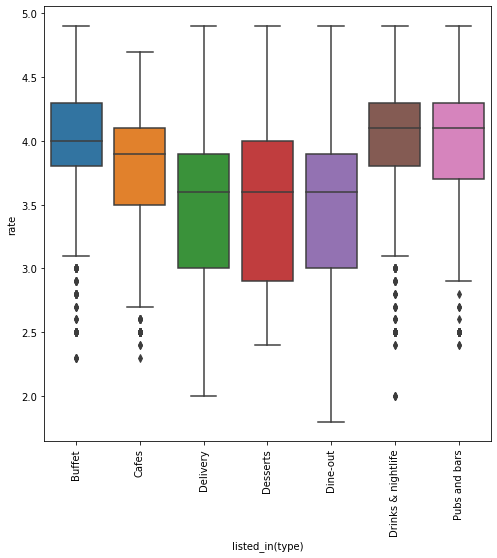

In [62]:
plt.figure(figsize = (8, 8))
g = sns.boxplot(x = 'listed_in(type)', y = 'rate', data = data)
plt.xticks(rotation = 90)
plt.show()

Majority of the Restaurants of type 'Drinks & nightlife' and 'Pubs and bars' have a high median rating. The median value of these kind of restaurants is greater than the 75th Percentile value of rest of the restaurant types except that of 'Buffet' type. The IQR is highest for 'Desserts' category which indicates large amount of variation about median.

# MODELS 

In [63]:
#Encode the input Variables
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

zomato_en = Encode(data.copy())
zomato_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),Number_of_cuisines_offered
0,0,0,0,4.1,775,0,0,0,0,0,0,0,0
1,1,0,1,4.1,787,0,0,1,0,1,0,0,0
2,2,0,1,3.8,918,0,1,2,0,2,0,0,0
3,3,1,1,3.7,88,0,2,3,1,3,0,0,1
4,4,1,1,3.8,166,1,0,4,2,4,0,0,1


In [64]:
from sklearn.model_selection import train_test_split

x = zomato_en.iloc[:,[1,2,4,5,6,7,8,10]] 
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item
14566,1,0,410,17,17,724,20,0
21150,1,1,33,3,0,279,5,0
7258,1,1,0,30,2,38,17,0
19921,0,1,99,12,2,3,1,3316
23847,1,0,151,3,35,2149,34,0


**1.Linear Regression**

In [65]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2934613468548809

**2.LASSO REGRESSION**

In [66]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [67]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train, y_train)

r2_score(y_test,lasso.predict(x_test))

0.29346119320434694

**3.Decision TreeRegressor**

In [68]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9186463766565646

**4.Random Forest Regressor**

In [69]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.9417583162263621

**5.Gradient Boosting Regressor**

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)

r2_score(y_test,y_predict)

0.7950949162635975

**6.XGB Regressor**

In [71]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.8963328586459267

In [72]:

models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.941758
2,Decision Tree,0.918646
5,XgBoost,0.896333
4,Gradient Boost,0.795095
0,Linear Regression,0.293461
1,Lasso Regression,0.293461
